In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [26]:
data_url = 'https://bit.ly/HDSC-StageOneDataset'

In [3]:
data = pd.read_csv(data_url)

In [4]:
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [5]:
data.shape

(29523, 11)

In [6]:
len(data)

29523

In [7]:
data2 = data.dropna()
data2.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [8]:
data2.set_index('record_id', drop=True, inplace=True)

In [9]:
data2.head()

,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
record_id,,,,,,,,,,
f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [10]:
data2.index.duplicated().sum()

0

In [11]:
data2.fuel_unit.value_counts()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [12]:
data2.groupby('fuel_unit')[['fuel_mmbtu_per_unit', 'fuel_cost_per_mmbtu']].sum()

,fuel_mmbtu_per_unit,fuel_cost_per_mmbtu
fuel_unit,,
bbl,46263.918771,101127.40938
gal,463.998760,1069.81824
gramsU,11568.374241,677.96300
kgU,352.157634,374.72200
mcf,11742.695055,62086.44798
mmbtu,1451.595361,598.61900
mwdth,851.489524,43.78900
mwhth,679.415411,152.92000
ton,175381.071417,378004.16417


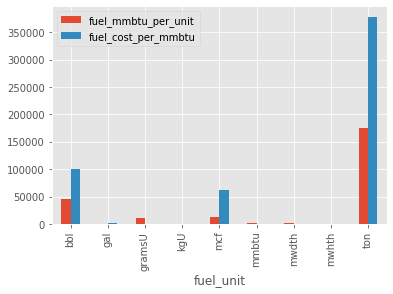

In [13]:
data2.groupby('fuel_unit')[['fuel_mmbtu_per_unit', 'fuel_cost_per_mmbtu']].sum().plot(kind='bar')

In [14]:
data2[data2['report_year']==2018]
data2[data2['report_year']==2017]
data2[data2['report_year']==2016]
data2[data2['report_year']==1999]
data2[data2['report_year']==1996]
data2[data2['report_year']==2015]
data2[data2['report_year']==1997]
data2[data2['report_year']==1998]
data2[data2['report_year']==2014]
data2[data2['report_year']==1995]
data2[data2['report_year']==2004]
data2[data2['report_year']==2002]
data2[data2['report_year']==2013]
data2[data2['report_year']==2003]
data2[data2['report_year']==1994]
data2[data2['report_year']==2009]
data2[data2['report_year']==2008]
data2[data2['report_year']==2011]
data2[data2['report_year']==2005]
data2[data2['report_year']==2006]
data2[data2['report_year']==2010]
data2[data2['report_year']==2000]
data2[data2['report_year']==2001]
data2[data2['report_year']==2007]

,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
record_id,,,,,,,,,,
f1_fuel_2007_12_186_0_1,186,2007,altavista,coal,ton,152665.0,25.660000,80.460,79.83,3.140
f1_fuel_2007_12_186_0_2,186,2007,altavista,gas,mcf,24908.0,1.040000,11.090,12.14,14.090
f1_fuel_2007_12_186_0_3,186,2007,altavista,waste,ton,25628.0,0.007943,18.080,17.99,1.140
f1_fuel_2007_12_186_0_4,186,2007,bellemeade,gas,mcf,3415467.0,1.029000,8.157,8.69,14.010
f1_fuel_2007_12_186_0_5,186,2007,bellemeade,oil,bbl,12104.0,5.880000,69.993,73.04,11.900
...,...,...,...,...,...,...,...,...,...,...
f1_fuel_2007_12_87_0_10,87,2007,ninemile point,gas,mcf,47395977.0,1.033300,7.781,0.00,7.530
f1_fuel_2007_12_87_0_13,87,2007,sterlington,gas,mcf,572644.0,1.034000,8.015,0.00,7.751
f1_fuel_2007_12_87_1_1,87,2007,waterford 1&2,gas,mcf,6077885.0,1.032000,7.889,0.00,7.644


In [15]:
data2.fuel_type_code_pudl.value_counts()

gas        11433
coal        8496
oil         8043
nuclear      803
waste        437
other        131
Name: fuel_type_code_pudl, dtype: int64

In [16]:
data3 = data.loc[:, ['report_year','fuel_type_code_pudl','fuel_qty_burned']].reset_index(drop=True)
data3

,report_year,fuel_type_code_pudl,fuel_qty_burned
0,1994,coal,5377489.0
1,1994,coal,10486945.0
2,1994,coal,2978683.0
3,1994,coal,3739484.0
4,1994,gas,40533.0
...,...,...,...
29518,2018,gas,18799.0
29519,2018,gas,806730.0
29520,2018,gas,104554.0
29521,2018,coal,315945.0


In [17]:
gas= data3.loc[data3.fuel_type_code_pudl == 'gas', 'fuel_qty_burned'].rename('gas').reset_index(drop=True)
coal= data3.loc[data3.fuel_type_code_pudl == 'coal', 'fuel_qty_burned'].rename('coal').reset_index(drop=True)
oil= data3.loc[data3.fuel_type_code_pudl == 'oil', 'fuel_qty_burned'].rename('oil').reset_index(drop=True)
nuclear= data3.loc[data3.fuel_type_code_pudl == 'nuclear', 'fuel_qty_burned'].rename('nuclear').reset_index(drop=True)
waste= data3.loc[data3.fuel_type_code_pudl == 'waste', 'fuel_qty_burned'].rename('waste').reset_index(drop=True)
others= data3.loc[data3.fuel_type_code_pudl == 'others', 'fuel_qty_burned'].rename('others').reset_index(drop=True)

In [18]:
data2.loc[data2['report_year']==2018, ['plant_name_ferc1','fuel_unit']]

,plant_name_ferc1,fuel_unit
record_id,,
f1_fuel_2018_12_122_0_2,big stone,bbl
f1_fuel_2018_12_122_0_4,coyote,ton
f1_fuel_2018_12_122_0_5,coyote,bbl
f1_fuel_2018_12_122_0_7,neal #4,ton
f1_fuel_2018_12_122_0_8,neal #4,bbl
...,...,...
f1_fuel_2018_12_12_0_13,neil simpson ct #1,mcf
f1_fuel_2018_12_12_1_1,cheyenne prairie 58%,mcf
f1_fuel_2018_12_12_1_10,lange ct facility,mcf


In [19]:
data2.fuel_unit.value_counts()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [20]:
data2.head(10)

,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
record_id,,,,,,,,,,
f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.59,18.53,1.121
f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.58,18.53,1.120
f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.72,38.12,1.650
f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.21,45.99,1.970
f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.77,2.77,2.570
f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922000,44.24,43.25,1.850
f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,nuclear,kgU,2260.0,0.064094,28.77,0.00,0.450
f1_fuel_1994_12_2_1_10,2,1994,resondent's portion,coal,ton,5372133.0,24.840000,58.54,55.13,2.360
f1_fuel_1994_12_2_2_10,2,1994,respondent's portion,coal,ton,817520.0,24.290000,33.97,34.65,1.400


In [21]:
data2.groupby('fuel_unit')['fuel_qty_burned'].mean()

fuel_unit
bbl       6.133931e+04
gal       3.449470e+05
gramsU    7.963714e+05
kgU       2.256575e+05
mcf       4.870243e+06
mmbtu     1.364729e+07
mwdth     6.774796e+05
mwhth     2.892479e+07
ton       1.667436e+06
Name: fuel_qty_burned, dtype: float64

In [22]:
data2.loc[(data2['report_year']==1994) & (data2['fuel_unit']=='ton')]['fuel_qty_burned'].sum()

704310419.0

In [23]:
data2.loc[data2['report_year']==1994, 'fuel_qty_burned'].sum()

3259893510.0

In [24]:
data2.loc[(data2['report_year']==1994) & (data2['fuel_unit']=='ton')]['fuel_mmbtu_per_unit'].sum()

10147.284376

In [36]:
data2.groupby(['report_year', 'fuel_type_code_pudl'])[['fuel_qty_burned', 'fuel_cost_per_unit_burned']].sum()

fuel_qty_burned  fuel_cost_per_unit_burned
report_year fuel_type_code_pudl                                            
1994        coal                    7.043443e+08                  14809.322
            gas                     2.389428e+09                  10776.366
            nuclear                 1.609787e+08                 227845.720
            oil                     1.461301e+06                   9289.724
            other                   2.439516e+06                    116.693
...                                          ...                        ...
2018        coal                    3.199996e+08                   9417.736
            gas                     3.476148e+09                   4322.494
            nuclear                 1.670945e+08                 173267.161
            oil                     5.974488e+06                  33654.032
            waste                   3.296373e+06                    660.972

[145 rows x 2 columns]

In [65]:
a=data2.loc[data2['report_year']==2014][['report_year', 'fuel_cost_per_unit_burned', 'fuel_qty_burned']]
b=data2.loc[data2['report_year']==2015][['report_year', 'fuel_cost_per_unit_burned', 'fuel_qty_burned']]
c=data2.loc[data2['report_year']==2016][['report_year', 'fuel_cost_per_unit_burned','fuel_qty_burned']]

In [54]:
data2.loc[data2['report_year']==2014]

,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
record_id,,,,,,,,,,
f1_fuel_2014_12_122_0_1,122,2014,big stone,coal,ton,453825.0,16.572,33.834,33.834,2.042
f1_fuel_2014_12_122_0_2,122,2014,big stone,oil,bbl,1804.0,5.880,118.718,118.718,20.190
f1_fuel_2014_12_122_0_4,122,2014,coyote,coal,ton,247404.0,13.794,20.595,20.595,1.493
f1_fuel_2014_12_122_0_5,122,2014,coyote,oil,bbl,1290.0,5.880,124.857,124.857,21.234
f1_fuel_2014_12_122_0_7,122,2014,neal #4,coal,ton,227349.0,17.186,31.735,31.735,1.847
...,...,...,...,...,...,...,...,...,...,...
f1_fuel_2014_12_12_1_5,12,2014,wyodak-bhp 20% share,coal,ton,411774.0,15.982,0.640,13.960,0.910
f1_fuel_2014_12_12_1_9,12,2014,neil simpson ct #1,gas,mcf,112450.0,0.980,10.360,10.360,10.580
f1_fuel_2014_12_12_1_12,12,2014,lange ct facility,gas,mcf,40738.0,1.022,8.570,8.570,8.390


In [73]:
a=a.reset_index(drop=True).groupby('report_year').sum()
b=b.reset_index(drop=True).groupby('report_year').sum()
c=c.reset_index(drop=True).groupby('report_year').sum()

In [78]:
a.append([b,c])

,fuel_cost_per_unit_burned,fuel_qty_burned
report_year,,
2014,517208.396,3.155392e+09
2015,259647.715,3.644586e+09
2016,255151.689,3.794419e+09


In [102]:
dt1=data2.loc[data2['fuel_type_code_pudl']=='coal'][['fuel_type_code_pudl', 'fuel_cost_per_unit_burned', 'fuel_qty_burned']]
dt2=data2.loc[data2['fuel_type_code_pudl']=='gas'][['fuel_type_code_pudl', 'fuel_cost_per_unit_burned', 'fuel_qty_burned']]
dt3=data2.loc[data2['fuel_type_code_pudl']=='oil'][['fuel_type_code_pudl', 'fuel_cost_per_unit_burned', 'fuel_qty_burned']]
dt4=data2.loc[data2['fuel_type_code_pudl']=='nuclear'][['fuel_type_code_pudl', 'fuel_cost_per_unit_burned', 'fuel_qty_burned']]
dt5=data2.loc[data2['fuel_type_code_pudl']=='others'][['fuel_type_code_pudl', 'fuel_cost_per_unit_burned', 'fuel_qty_burned']]
dt6=data2.loc[data2['fuel_type_code_pudl']=='water'][['fuel_type_code_pudl', 'fuel_cost_per_unit_burned', 'fuel_qty_burned']]

In [153]:
dt5=dt5.reset_index(drop=True).groupby('fuel_type_code_pudl').sum()

In [154]:
dt6=dt6.reset_index(drop=True).groupby('fuel_type_code_pudl').sum()

In [156]:
print(dt1,dt2,dt3,dt4,dt5,dt6)

                     fuel_cost_per_unit_burned  fuel_qty_burned
fuel_type_code_pudl                                            
coal                                574356.677     1.614059e+10                      fuel_cost_per_unit_burned  fuel_qty_burned
fuel_type_code_pudl                                            
gas                                 156714.385     5.542399e+10                      fuel_cost_per_unit_burned  fuel_qty_burned
fuel_type_code_pudl                                            
oil                                1359632.429      508631178.0                      fuel_cost_per_unit_burned  fuel_qty_burned
fuel_type_code_pudl                                            
nuclear                            4052920.099     4.413749e+09 Empty DataFrame
Columns: [fuel_cost_per_unit_burned, fuel_qty_burned]
Index: [] Empty DataFrame
Columns: [fuel_cost_per_unit_burned, fuel_qty_burned]
Index: []


In [163]:
#water and other contains only an empty data accross the columns described using the append functio, why?...
data_m=dt1.append([dt2,dt3,dt4,dt5,dt6])

In [159]:
A= [1,2,3,4,5,6]
B= [13,21,34]

In [160]:
A

[1, 2, 3, 4, 5, 6, [13, 21, 34]]

In [161]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [165]:
data2.head()

,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
record_id,,,,,,,,,,
f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [167]:
data2.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_delivered'].mean()

fuel_type_code_pudl
coal         117.461873
gas           12.136047
nuclear    29151.161702
oil          314.427940
other         18.758473
waste         18.542554
Name: fuel_cost_per_unit_delivered, dtype: float64

In [173]:
ab=data2[data2['report_year']==2018][['report_year', 'fuel_cost_per_unit_delivered']]
ab1=data2[data2['report_year']==2004][['report_year', 'fuel_cost_per_unit_delivered']]
ab2=data2[data2['report_year']==2009][['report_year', 'fuel_cost_per_unit_delivered']]
ab3=data2[data2['report_year']==1996][['report_year', 'fuel_cost_per_unit_delivered']]
ab4=data2[data2['report_year']==1997][['report_year', 'fuel_cost_per_unit_delivered']]

In [178]:
ab=ab.reset_index(drop=True).groupby('report_year').sum()
ab1=ab1.reset_index(drop=True).groupby('report_year').sum()
ab2=ab2.reset_index(drop=True).groupby('report_year').sum()
ab3=ab3.reset_index(drop=True).groupby('report_year').sum()
ab4=ab4.reset_index(drop=True).groupby('report_year').sum()

In [179]:
ab.append([ab1,ab2,ab3,ab4]).sort_va

,fuel_cost_per_unit_delivered
report_year,
2018,4.745580e+05
2004,1.662705e+05
2009,7.965431e+05
1996,1.000587e+07
1997,1.218737e+07


In [180]:
data2['fuel_mmbtu_per_unit'].std()

10.537478115220459

In [181]:
data2['fuel_mmbtu_per_unit'].describe()

count    29343.000000
mean         8.477481
std         10.537478
min          0.000001
25%          1.024000
50%          5.763072
75%         17.000000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

In [188]:
q1=data2.groupby('fuel_cost_per_unit_burned')[['fuel_mmbtu_per_unit','fuel_cost_per_unit_delivered']].count()
q2=data2.groupby('fuel_cost_per_unit_burned')[['fuel_cost_per_unit_delivered', 'utility_id_ferc1']].count()
q3=data2.groupby('fuel_cost_per_unit_burned')[['utility_id_ferc1', 'report_year']].count()
q4=data2.groupby('fuel_cost_per_unit_burned')[['fuel_qty_burned', 'fuel_mmbtu_per_unit']].count
q5=data2.groupby('fuel_cost_per_unit_burned')[['fuel_qty_burned', 'fuel_cost_per_unit_delivered']].count()

In [196]:
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [207]:
#Q10
data.isna().mean()*100

record_id                       0.000000
utility_id_ferc1                0.000000
report_year                     0.000000
plant_name_ferc1                0.000000
fuel_type_code_pudl             0.000000
fuel_unit                       0.609694
fuel_qty_burned                 0.000000
fuel_mmbtu_per_unit             0.000000
fuel_cost_per_unit_burned       0.000000
fuel_cost_per_unit_delivered    0.000000
fuel_cost_per_mmbtu             0.000000
dtype: float64

In [208]:
A= [1,2,3,4,5,6]
B= [13,21,34]

In [212]:
A

[1, 2, 3, 4, 5, 6, [13, 21, 34], [13, 21, 34]]

In [213]:
A.extend(B)

In [214]:
A

[1, 2, 3, 4, 5, 6, [13, 21, 34], [13, 21, 34], 13, 21, 34]

In [215]:
c=[1,3,4,5,6]
d=[19,2]

In [216]:
f=c.extend(d)

In [218]:
f

In [227]:
aa1=data[data['report_year']==1998]['fuel_cost_per_unit_burned'].sum()
aa2=data[data['report_year']==1994]['fuel_cost_per_unit_burned'].sum()

In [236]:
(aa1 - aa2)

-123053.45900000003